In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import pycircos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Bio import SeqIO 
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [3]:
#organism = "human"
df = pd.read_csv("../data/chromosome/chromosome_human.tsv", sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'H_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'human'# タグをつける


# organism = "rice"
df1 = pd.read_csv("../data/chromosome/chromosome_rice_rmB1.tsv", sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# タグをつける

combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)
combined_df.to_csv("../data/chromosome/HR_combined.tsv", sep='\t', index=False)
combined_df

,chr,start,end,organism
0,H_1,1,248956422,human
1,H_2,1,242193529,human
2,H_3,1,198295559,human
3,H_4,1,190214555,human
4,H_5,1,181538259,human
5,H_6,1,170805979,human
6,H_7,1,159345973,human
7,H_8,1,145138636,human
8,H_9,1,138394717,human
9,H_10,1,133797422,human


In [4]:
# Initialize
circle = Gcircle(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

In [5]:
# Initialize
circle = Gcircle(figsize=(10,10))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # 染色体番号だけを取得
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'human':
            color = plt.cm.Blues(chrom_number / 24)  # 22+X+Yで動的に色を変える
        else:
            color = plt.cm.Greens(chrom_number / 14)  # 12+X+Yで動的に色を変える
    except ValueError:  # "X", "Y", "Mt", "Pt"など、数値に変換できない場合
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.5, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 1000x1000 with 0 Axes>

In [6]:
circle.set_garcs(0,360)

In [7]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

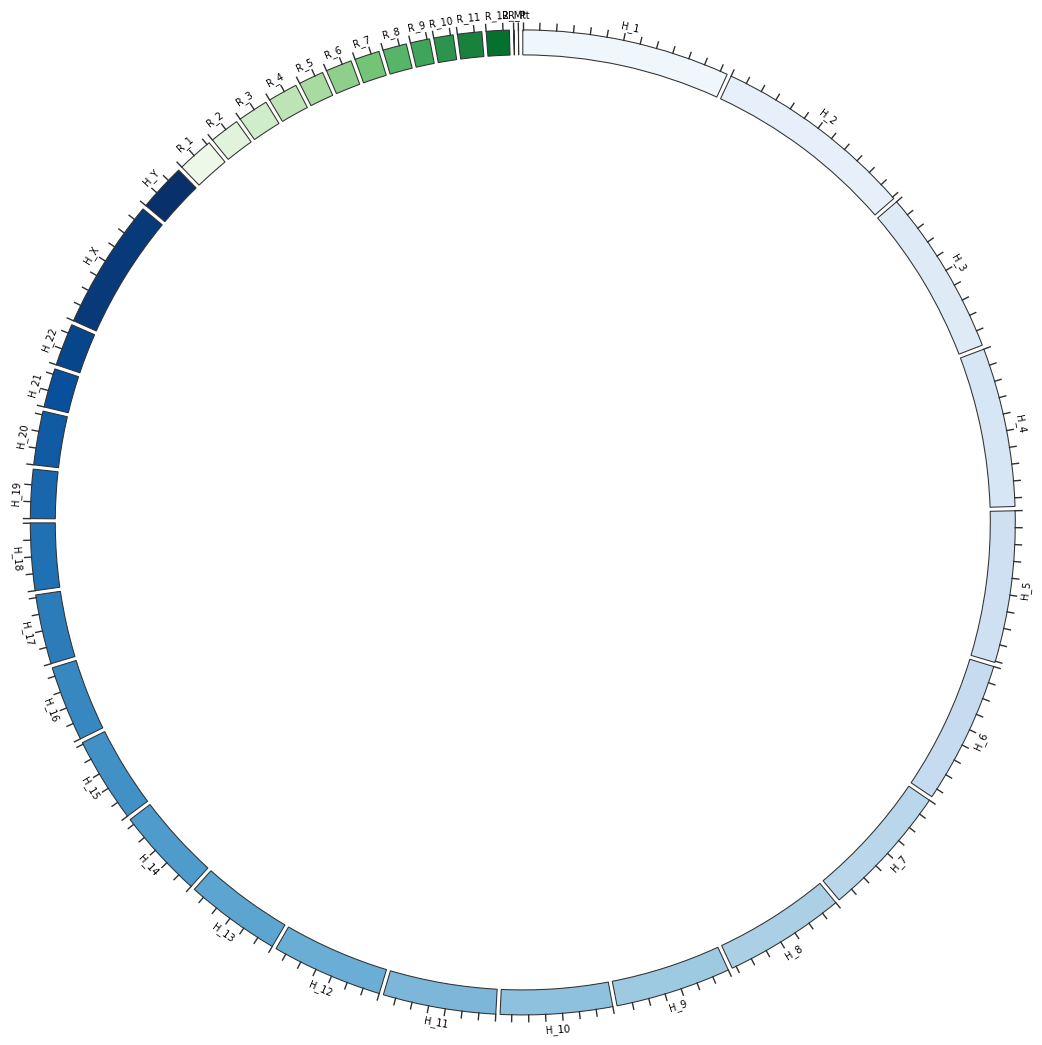

In [8]:
circle.figure

#### Scatter plot of human vs rice upregulated genes

In [9]:
#organism = "human"
df_h_score = pd.read_csv("../data/human/human_position_up.tsv", sep='\t')
df_h_score_subset = df_h_score[['Gene stable ID',
                        'Chromosome/scaffold name', 
                        'Gene start (bp)',
                        'Gene end (bp)',
                        'HN-score(HN5)']].copy()
df_h_score_subset['Chromosome/scaffold name'] = 'H_' + df_h_score_subset['Chromosome/scaffold name'].astype(str)
df_h_score_subset['organism'] = 'human'# タグをつける


# organism = "rice"
df_r_score = pd.read_csv("../data/rice_position_up.tsv", sep='\t')
df_r_score_subset = df_r_score[['Gene stable ID',
                        'Chromosome/scaffold name', 
                        'Gene start (bp)',
                        'Gene end (bp)',
                        'HN-score(HN5)']].copy()
df_r_score_subset['Chromosome/scaffold name'] = 'R_' + df_r_score_subset['Chromosome/scaffold name'].astype(str)
df_r_score_subset['organism'] = 'rice'# タグをつける


# combined human and rice DataFrame
combined_df_score = pd.concat([df_h_score_subset, df_r_score_subset])
combined_df_score.reset_index(drop=True, inplace=True)
combined_df_score.to_csv("../data/chromosome/HR_combined.tsv", sep='\t', index=False)
combined_df_score

,Gene stable ID,Chromosome/scaffold name,Gene start (bp),Gene end (bp),HN-score(HN5),organism
0,ENSG00000132952,H_13,30617693,30660770,89.0,human
1,ENSG00000198743,H_21,34073578,34106260,58.0,human
2,ENSG00000215547,H_20,31257664,31259632,83.0,human
3,ENSG00000139597,H_13,32400723,32428311,58.0,human
4,ENSG00000122035,H_13,27270830,27275192,58.0,human
...,...,...,...,...,...,...
570,Os08g0444440,R_8,21644628,21646515,71.0,rice
571,Os07g0549800,R_7,21823012,21825223,57.0,rice
572,Os01g0901600,R_1,39257838,39261362,52.0,rice
573,Os08g0546800,R_8,27382872,27384470,73.0,rice


In [10]:
# Initialize
import collections
arcdata_dict = collections.defaultdict(dict)

for index, row in combined_df_score.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start (bp)']
    end = row['Gene end (bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # arcdata_dictにnameがない場合, arcdata_dictに追加
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)


# plot
vmin, vmax = combined_df_score['HN-score(HN5)'].min(), combined_df_score['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(840, 940),
        facecolor="orangered",
        edgecolor="black",
        spine=True
    )

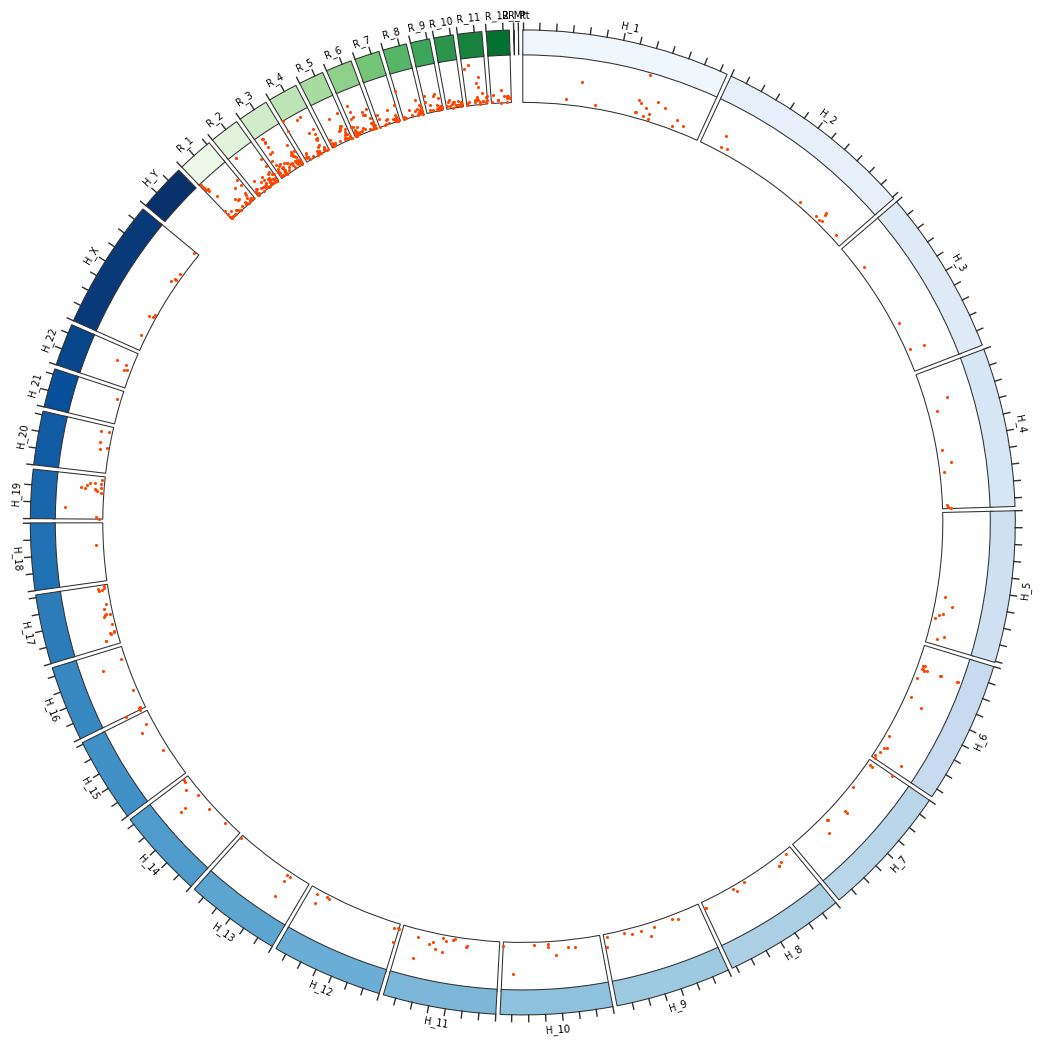

In [11]:
circle.figure

#### linkplot of GOslim terms for human vs rice upregulated genes

##### human

In [19]:
# Prepare the extract up genes data from GOslim file

# organism = "human"
# Using df_h_score_subset for extract up genes data from GOslim file

df_h_goslim = pd.read_csv("../data/human/biomart_human_goslim_R110.tsv", sep='\t')
df_h_goslim['Chromosome/scaffold name'] = 'H_' + df_h_goslim['Chromosome/scaffold name'].astype(str)


extract_df_h_goslim = pd.merge(
    df_h_score_subset, df_h_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='inner'
)

# Extract genes with no annotations
extract_df_h_goslim_with_indicator = pd.merge(
    df_h_score_subset, df_h_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='left',
    indicator=True # add indicator column to show the difference
)

# extract_df_h_goslim_with_indicator
left_only_rows = extract_df_h_goslim_with_indicator[extract_df_h_goslim_with_indicator['_merge'] == 'left_only']

# left_only_rows
left_only_rows.to_csv("../data/human/left_only_rows.tsv", sep='\t', index=False)
extract_df_h_goslim.to_csv("../data/human/human_df_h_goslim_up.tsv", sep='\t', index=False)
extract_df_h_goslim


/tmp/ipykernel_98103/2627280157.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_h_goslim = pd.read_csv("../data/human/biomart_human_goslim_R110.tsv", sep='\t')


,Gene stable ID,Chromosome/scaffold name,Gene start (bp),Gene end (bp),HN-score(HN5),organism,start2 (bp),end2 (bp),GOSlim GOA Accession(s),GOSlim GOA Description
0,ENSG00000132952,H_13,30617693,30660770,89,human,30617693,30660770,GO:0043226,organelle
1,ENSG00000132952,H_13,30617693,30660770,89,human,30617693,30660770,GO:0005634,nucleus
2,ENSG00000132952,H_13,30617693,30660770,89,human,30617693,30660770,GO:0003824,catalytic activity
3,ENSG00000132952,H_13,30617693,30660770,89,human,30617693,30660770,GO:0016787,hydrolase activity
4,ENSG00000132952,H_13,30617693,30660770,89,human,30617693,30660770,GO:0140096,"catalytic activity, acting on a protein"
...,...,...,...,...,...,...,...,...,...,...
4819,ENSG00000162772,H_1,212565334,212620777,88,human,212565334,212620777,GO:0005654,nucleoplasm
4820,ENSG00000162772,H_1,212565334,212620777,88,human,212565334,212620777,GO:0005730,nucleolus
4821,ENSG00000162772,H_1,212565334,212620777,88,human,212565334,212620777,GO:0005694,chromosome
4822,ENSG00000162772,H_1,212565334,212620777,88,human,212565334,212620777,GO:0023052,signaling


##### rice

In [13]:
# organism = "rice"
# Using df_r_score_subset for extract up genes data from GOslim file

df_r_goslim = pd.read_csv("../data/biomart_rice_goslim_R56.tsv", sep='\t')
df_r_goslim['Chromosome/scaffold name'] = 'R_' + df_r_goslim['Chromosome/scaffold name'].astype(str)

extract_df_r_goslim = pd.merge(
    df_r_score_subset, df_r_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='inner'
)

# Extract genes with no annotations
extract_df_r_goslim_with_indicator = pd.merge(
    df_r_score_subset, df_r_goslim,
    left_on=['Gene stable ID', 'Chromosome/scaffold name'],
    right_on=['Gene stable ID', 'Chromosome/scaffold name'],
    how='left',
    indicator=True # add indicator column to show the difference
)

# extract_df_r_goslim_with_indicator
left_only_rows = extract_df_r_goslim_with_indicator[extract_df_r_goslim_with_indicator['_merge'] == 'left_only']

# left_only_rows
left_only_rows.to_csv("../data/rice_left_only_rows.tsv", sep='\t', index=False)
extract_df_r_goslim.to_csv("../data/rice_df_r_goslim_up.tsv", sep='\t', index=False)
extract_df_r_goslim

/tmp/ipykernel_98103/3218751590.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_r_goslim = pd.read_csv("../data/biomart_rice_goslim_R56.tsv", sep='\t')


,Gene stable ID,Chromosome/scaffold name,Gene start (bp),Gene end (bp),HN-score(HN5),organism,start1 (bp),end1 (bp),GOSlim GOA Accession(s),GOSlim GOA Description
0,Os10g0419300,R_10,14746572,14750175,53.0,rice,14746572,14750175,GO:0003674,molecular_function
1,Os10g0419300,R_10,14746572,14750175,53.0,rice,14746572,14750175,GO:0005488,binding
2,Os10g0419300,R_10,14746572,14750175,53.0,rice,14746572,14750175,GO:0003676,nucleic acid binding
3,Os10g0419300,R_10,14746572,14750175,53.0,rice,14746572,14750175,GO:0003677,DNA binding
4,Os10g0419300,R_10,14746572,14750175,53.0,rice,14746572,14750175,GO:0005575,cellular_component
...,...,...,...,...,...,...,...,...,...,...
2814,Os04g0352400,R_4,16813905,16817974,227.0,rice,16813905,16817974,GO:0008152,metabolic process
2815,Os04g0352400,R_4,16813905,16817974,227.0,rice,16813905,16817974,GO:0036211,protein modification process
2816,Os04g0352400,R_4,16813905,16817974,227.0,rice,16813905,16817974,GO:0019538,protein metabolic process
2817,Os04g0352400,R_4,16813905,16817974,227.0,rice,16813905,16817974,GO:0005515,protein binding


##### __Merge human and rice GOslim terms__

In [14]:
# merge dataframe based on common column 'GOSlim GOA Accession(s)'
merged_df_goslim = pd.merge(
    extract_df_r_goslim, extract_df_h_goslim,
    left_on=['GOSlim GOA Accession(s)'],
    right_on=['GOSlim GOA Accession(s)'],
    how='inner',
    suffixes=('_rice', '_human')
)

# extract necessary columns

merged_df_goslim = merged_df_goslim[['GOSlim GOA Accession(s)',
                                     'GOSlim GOA Description_rice',
                                     'GOSlim GOA Description_human',
                                     'Gene stable ID_rice',
                                     'Gene stable ID_human',
                                     'Chromosome/scaffold name_rice',
                                     'start1 (bp)',
                                     'end1 (bp)',
                                     'Chromosome/scaffold name_human',
                                     'start2 (bp)',
                                     'end2 (bp)',
                                     'HN-score(HN5)_rice',
                                     'HN-score(HN5)_human']]

# Remove duplicate rows based on specific columns
merged_df_goslim = merged_df_goslim.drop_duplicates(subset=['Gene stable ID_rice', 'Gene stable ID_human'])
merged_df_goslim.to_csv("../data/merged_df_goslim.tsv", sep='\t', index=False)
merged_df_goslim

,GOSlim GOA Accession(s),GOSlim GOA Description_rice,GOSlim GOA Description_human,Gene stable ID_rice,Gene stable ID_human,Chromosome/scaffold name_rice,start1 (bp),end1 (bp),Chromosome/scaffold name_human,start2 (bp),end2 (bp),HN-score(HN5)_rice,HN-score(HN5)_human
0,GO:0003677,DNA binding,DNA binding,Os10g0419300,ENSG00000179388,R_10,14746572,14750175,H_8,22687659,22693480,53.0,69
2,GO:0003677,DNA binding,DNA binding,Os10g0419300,ENSG00000170345,R_10,14746572,14750175,H_14,75278826,75282230,53.0,165
9,GO:0003677,DNA binding,DNA binding,Os10g0419300,ENSG00000187559,R_10,14746572,14750175,H_9,68302867,68305084,53.0,64
10,GO:0003677,DNA binding,DNA binding,Os10g0419300,ENSG00000204103,R_10,14746572,14750175,H_20,40685848,40689236,53.0,86
11,GO:0003677,DNA binding,DNA binding,Os10g0419300,ENSG00000187475,R_10,14746572,14750175,H_6,26107412,26108135,53.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51196,GO:0005856,cytoskeleton,cytoskeleton,Os01g0257300,ENSG00000169402,R_1,8586157,8586941,H_7,6754103,6799365,45.0,67
51199,GO:0005856,cytoskeleton,cytoskeleton,Os01g0257300,ENSG00000155026,R_1,8586157,8586941,H_7,5925550,5970689,45.0,58
51202,GO:0005856,cytoskeleton,cytoskeleton,Os01g0257300,ENSG00000187049,R_1,8586157,8586941,H_11,61392393,61398866,45.0,51
51216,GO:0005856,cytoskeleton,cytoskeleton,Os01g0257300,ENSG00000168334,R_1,8586157,8586941,H_3,39183210,39192596,45.0,67


In [15]:
# Add color data to 'GOSlim GOA Description' column
unique_ontologies = merged_df_goslim['GOSlim GOA Description_rice'].unique()

n = len(unique_ontologies)
colors = cm.rainbow(np.linspace(0, 1, n)) # create n colors by cm.rainbow

# create ontology_color_dict
ontology_color_dict = {term: color for term, color in zip(unique_ontologies, colors)}

# add to garc_dict
for term, color in ontology_color_dict.items():
    circle._garc_dict[term] = {'facecolor': color}

In [16]:
import csv
from collections import Counter

values_all   = [] 
arcdata_dict = collections.defaultdict(dict)

# Count the number of ontology terms
ontology_count = Counter()
with open("../data/merged_df_goslim.tsv", mode='r', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        ontology = row['GOSlim GOA Description_rice']
        ontology_count[ontology] += 1

min_linewidth = 0.0000000000000000001
max_linewidth = 0.0000000000000002

min_count = min(ontology_count.values())
max_count = max(ontology_count.values())


with open("../data/merged_df_goslim.tsv", mode='r', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        name1 = row['Chromosome/scaffold name_rice'] # rice
        start1 = int(row['start1 (bp)'])
        end1 = int(row['end1 (bp)'])
        name2 = row['Chromosome/scaffold name_human'] # human
        start2 = int(row['start2 (bp)'])
        end2 = int(row['end2 (bp)'])
        ontology = row['GOSlim GOA Description_rice']

        # Debug
        # デバッグ用にontologyとcircle._garc_dict[ontology]を出力
        print("Debugging Info:")
        print(f"ontology: {ontology}")
        print(f"circle._garc_dict[ontology]: {circle._garc_dict.get(ontology, 'Not found')}")

        count = ontology_count[ontology]
        linewidth = min_linewidth + (max_linewidth - min_linewidth) * ((count - min_count) / (max_count - min_count))
        
        source = (name1, start1, end1, 840)
        destination = (name2, start2, end2, 840)
        circle.chord_plot(source, 
                          destination, 
                          facecolor=circle._garc_dict[ontology]['facecolor'],
                          linewidth=linewidth)

Debugging Info:
ontology: DNA binding
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: DNA binding
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: DNA binding
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: DNA binding
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: DNA binding
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: DNA binding
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: DNA binding
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: DNA binding
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ])}
Debugging Info:
ontology: DNA binding
circle._garc_dict[ontology]: {'facecolor': array([0.5, 0. , 1. , 1. ])}
Debugging 

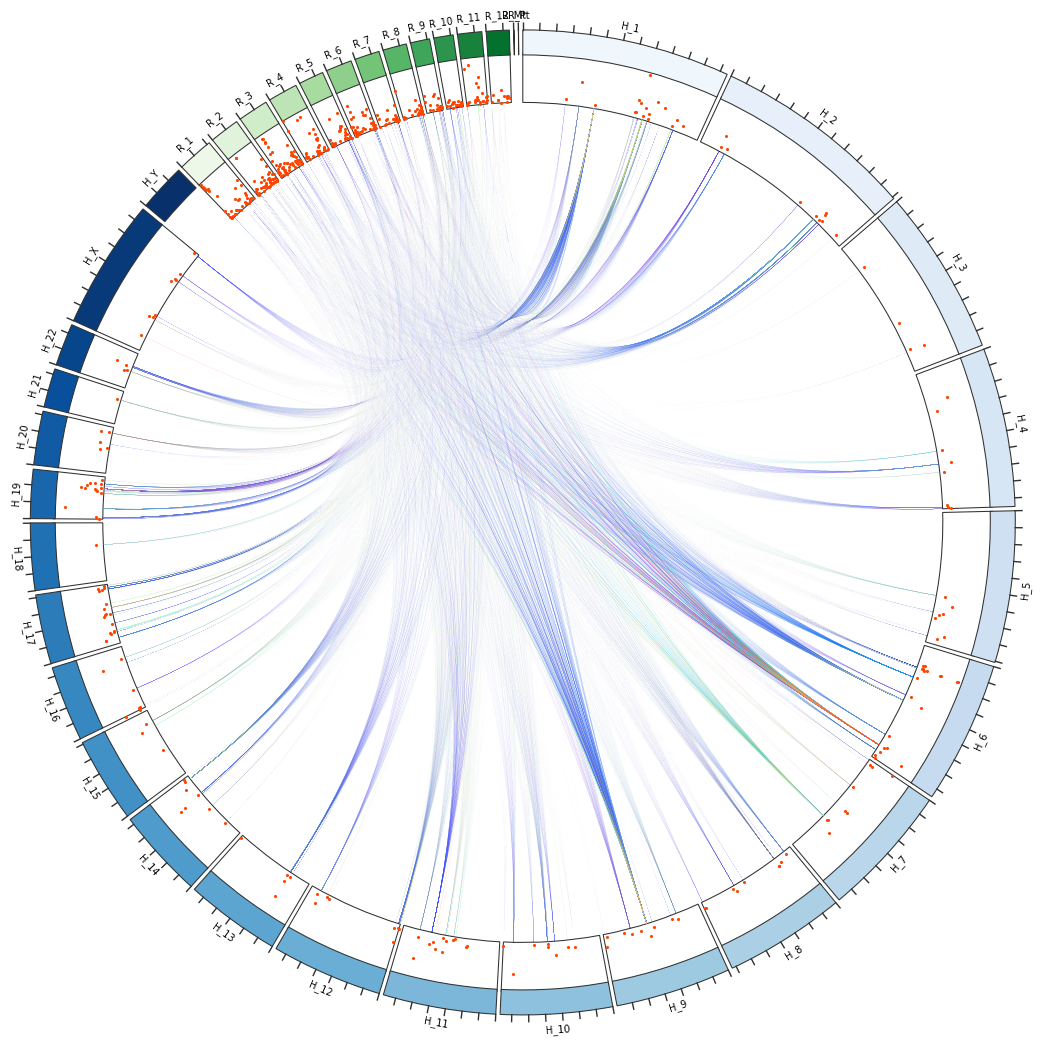

In [17]:
circle.figure

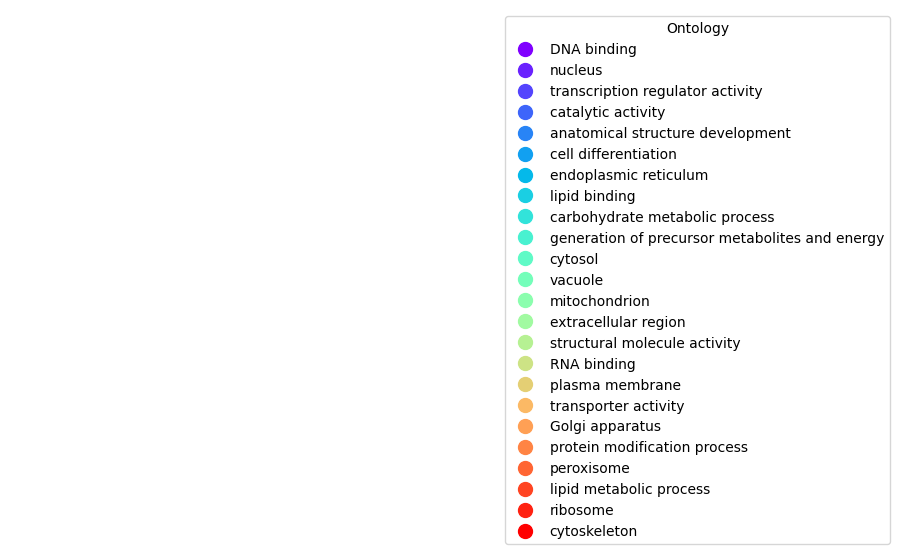

In [18]:
# 既存のコードの後に追加
fig, ax = plt.subplots(figsize=(6, 6))

# ontology_color_dictから各ontologyとその色を取得してレジェンドを作成
for ontology, color in ontology_color_dict.items():
    ax.plot([], [], label=ontology, color=color, marker='o', markersize=10, linestyle='None')

# レジェンドを表示
ax.legend(title="Ontology", bbox_to_anchor=(1.05, 1), loc='upper left')

# axを非表示に（実際のプロットは不要なため）
ax.axis('off')

# レジェンドのみを表示
plt.show()
